# Install Library

In [12]:
!pip install google-play-scraper
!pip install Sastrawi
!pip install wordcloud
!pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google_play_scraper import Sort, reviews
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import nltk

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Initialize stopwords for Indonesian
stop_words = set(stopwords.words('indonesian'))

# Now you can proceed with your code using `stop_words` correctly initialized


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raffy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raffy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raffy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Scraping Data

In [14]:
# from google_play_scraper import Sort
# from google_play_scraper.constants.element import ElementSpecs
# from google_play_scraper.constants.regex import Regex
# from google_play_scraper.constants.request import Formats
# from google_play_scraper.utils.request import post
# import pandas as pd
# import json
# from typing import List, Optional, Tuple

# from datetime import datetime
# from tqdm import tqdm
# import time

# app_id = 'com.vidio.android'

# MAX_COUNT_EACH_FETCH = 199


# class _ContinuationToken:
#     __slots__ = (
#         "token",
#         "lang",
#         "country",
#         "sort",
#         "count",
#         "filter_score_with",
#         "filter_device_with",
#     )

#     def __init__(
#         self, token, lang, country, sort, count, filter_score_with, filter_device_with
#     ):
#         self.token = token
#         self.lang = lang
#         self.country = country
#         self.sort = sort
#         self.count = count
#         self.filter_score_with = filter_score_with
#         self.filter_device_with = filter_device_with


# def _fetch_review_items(
#     url: str,
#     app_id: str,
#     sort: int,
#     count: int,
#     filter_score_with: Optional[int],
#     filter_device_with: Optional[int],
#     pagination_token: Optional[str],
# ):
#     dom = post(
#         url,
#         Formats.Reviews.build_body(
#             app_id,
#             sort,
#             count,
#             "null" if filter_score_with is None else filter_score_with,
#             "null" if filter_device_with is None else filter_device_with,
#             pagination_token,
#         ),
#         {"content-type": "application/x-www-form-urlencoded"},
#     )
#     match = json.loads(Regex.REVIEWS.findall(dom)[0])

#     return json.loads(match[0][2])[0], json.loads(match[0][2])[-2][-1]


# def reviews(
#     app_id: str,
#     lang: str = "en",
#     country: str = "us",
#     sort: Sort = Sort.MOST_RELEVANT,
#     count: int = 100,
#     filter_score_with: int = None,
#     filter_device_with: int = None,
#     continuation_token: _ContinuationToken = None,
# ) -> Tuple[List[dict], _ContinuationToken]:
#     sort = sort.value

#     if continuation_token is not None:
#         token = continuation_token.token

#         if token is None:
#             return (
#                 [],
#                 continuation_token,
#             )

#         lang = continuation_token.lang
#         country = continuation_token.country
#         sort = continuation_token.sort
#         count = continuation_token.count
#         filter_score_with = continuation_token.filter_score_with
#         filter_device_with = continuation_token.filter_device_with
#     else:
#         token = None

#     url = Formats.Reviews.build(lang=lang, country=country)

#     _fetch_count = count

#     result = []

#     while True:
#         if _fetch_count == 0:
#             break

#         if _fetch_count > MAX_COUNT_EACH_FETCH:
#             _fetch_count = MAX_COUNT_EACH_FETCH

#         try:
#             review_items, token = _fetch_review_items(
#                 url,
#                 app_id,
#                 sort,
#                 _fetch_count,
#                 filter_score_with,
#                 filter_device_with,
#                 token,
#             )
#         except (TypeError, IndexError):
#             # Handling exception by continuing with previous token
#             token = continuation_token.token
#             continue

#         for review in review_items:
#             result.append(
#                 {
#                     k: spec.extract_content(review)
#                     for k, spec in ElementSpecs.Review.items()
#                 }
#             )

#         _fetch_count = count - len(result)

#         if isinstance(token, list):
#             token = None
#             break

#         # Printing current count of fetched reviews
#         print(f"Current number of reviews fetched: {len(result)}")

#     return (
#         result,
#         _ContinuationToken(
#             token, lang, country, sort, count, filter_score_with, filter_device_with
#         ),
#     )


# def reviews_all(app_id: str, sleep_milliseconds: int = 0, **kwargs) -> list:
#     kwargs.pop("count", None)
#     kwargs.pop("continuation_token", None)

#     continuation_token = None

#     result = []

#     while True:
#         _result, continuation_token = reviews(
#             app_id,
#             count=MAX_COUNT_EACH_FETCH,
#             continuation_token=continuation_token,
#             **kwargs
#         )

#         result += _result

#         if continuation_token.token is None:
#             break

#         if sleep_milliseconds:
#             time.sleep(sleep_milliseconds / 1000)

#     return result

# result = []
# continuation_token = None
# reviews_count = 20000

# with tqdm(total=reviews_count, position=0, leave=True) as pbar:
#     while len(result) < reviews_count:
#         new_result, continuation_token = reviews(
#             app_id,
#             continuation_token=continuation_token,
#             lang='id',
#             country='id',
#             sort=Sort.MOST_RELEVANT,
#             filter_score_with=None,
#             count=199
#         )
#         if not new_result:
#             break
#         result.extend(new_result)
#         pbar.update(len(new_result))

# # Convert result to DataFrame
# df = pd.DataFrame(result)

# # Save DataFrame to CSV
# df.to_csv('data_scrape.csv', index=False)


# Load Data

In [15]:
# Read the CSV file into a DataFrame
data = pd.read_csv('data_scrape.csv')

# Select only the 'content' and 'score' columns
data = data[['content', 'score']]

# Display the first few rows of the selected columns
print(data.head())
data.info()

                                             content  score
0  Sangat kecewa dengan apl ini, saya sudah berla...      1
1  Tiap mau nonton iklan terus,2 iklan,terus udah...      1
2  Untuk aplikasi nya sudah bagus, malah bagus ba...      5
3  video yg ditonton sering nge lagpadahal sinyal...      2
4  Aplikasinya sudah bagus dan tidak terlalu bany...      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  20099 non-null  object
 1   score    20099 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 314.2+ KB


# Distribusi Skor

In [16]:
# Menghitung distribusi score
score_distribution = data['score'].value_counts().sort_index()

# Menampilkan distribusi score
print(score_distribution)

1    9856
2    2273
3    2165
4    1632
5    4173
Name: score, dtype: int64


# Pre-processing

In [26]:
# Fungsi pre-processing teks
def preprocess_text(text):
    # Menghapus emotikon
    text = re.sub(r':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|;-*\)|\(-*;|:-\(|:-\(|:\'\(|: \(/', '', text)

    # Menghapus emoji
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Menghapus URL
    text = re.sub(r'http\S+', '', text)

    # Menghapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi menggunakan nltk tokenizer
    tokens = nltk.word_tokenize(text)

    # Menghapus stop words
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

# Terapkan pre-processing pada kolom teks ulasan dan simpan hasilnya ke kolom baru 'data_clean'
data['data_clean'] = data['content'].apply(preprocess_text)

# Menampilkan hasil
print(data.head())

# Simpan DataFrame ke file CSV
data.to_csv('data_hasil_TextPreProcessing.csv', index=False)

                                             content  score  \
0  Sangat kecewa dengan apl ini, saya sudah berla...      1   
1  Tiap mau nonton iklan terus,2 iklan,terus udah...      1   
2  Untuk aplikasi nya sudah bagus, malah bagus ba...      5   
3  video yg ditonton sering nge lagpadahal sinyal...      2   
5  Kembalikan resolusi layar kayak dulu lagi, ada...      1   

                                          data_clean     label  
0  [kecewa, apl, berlangganan, kali, buka, aplika...  negative  
1  [nonton, iklan, iklanterus, udah, selesai, ikl...  negative  
2  [aplikasi, nya, bagus, bagus, bangett, nonton,...  positive  
3  [video, yg, ditonton, nge, lagpadahal, sinyal,...  negative  
5  [kembalikan, resolusi, layar, kayak, p, resolu...  negative  


# Pelabelan Data

In [18]:
# Menyiapkan label berdasarkan skor ulasan
def label_score(score):
    if score <= 2:
        return 'negative'
    elif score >= 4:
        return 'positive'
    else:
        return None  # Return None for scores that should be filtered out

data['label'] = data['score'].apply(label_score)

# Menghapus data yang tidak memiliki label
data = data[data['label'].notnull()]

# Menghitung jumlah setiap label
label_counts = data['label'].value_counts()
print("Label counts:\n", label_counts)

Label counts:
 negative    12129
positive     5805
Name: label, dtype: int64


# Eksplorasi Data

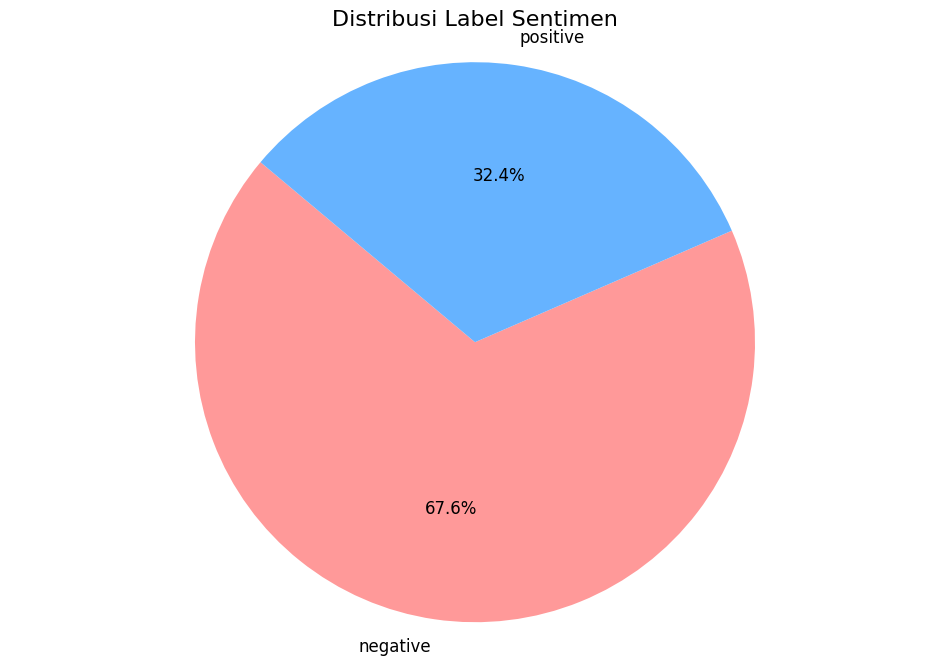

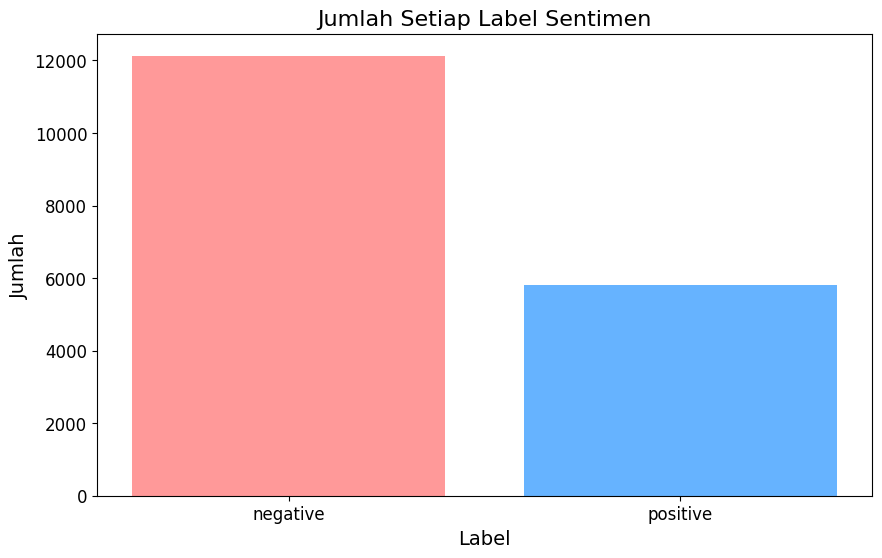

In [19]:
# Menghitung jumlah setiap label
label_counts = data['label'].value_counts()

# Warna yang lebih lembut (soft)
colors = ['#FF9999', '#66B3FF', '#99FF99']

# Membuat visualisasi pie chart dengan warna yang lebih lembut
plt.figure(figsize=(12, 8))
plt.pie(label_counts, labels=label_counts.index, startangle=140, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Distribusi Label Sentimen', fontsize=16)
plt.axis('equal')
plt.show()

# Membuat bar plot untuk jumlah setiap label
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts, color=colors)
plt.title('Jumlah Setiap Label Sentimen', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Split Data

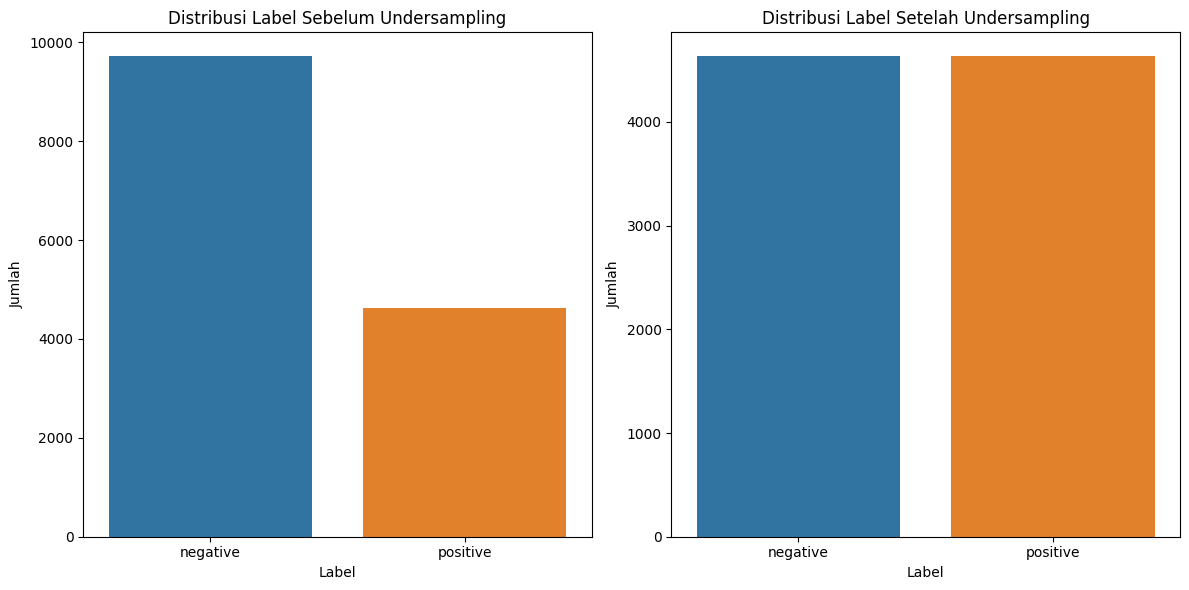

Jumlah data latih sebelum undersampling: 14347
Jumlah data uji: 3587
Jumlah data latih setelah undersampling: 9266
Distribusi kelas setelah undersampling:
 negative    4633
positive    4633
Name: label, dtype: int64


In [20]:
# Pisahkan fitur (X) dan target (y)
X = data['data_clean']
y = data['label']

# Pisahkan data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ubah X_train dan X_test menjadi array dua dimensi
X_train_reshaped = X_train.apply(lambda x: ' '.join(x)).values.reshape(-1, 1)
X_test_reshaped = X_test.apply(lambda x: ' '.join(x)).values.reshape(-1, 1)

# Lakukan undersampling pada data latih
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_reshaped, y_train)

# Visualisasi distribusi label sebelum undersampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribusi Label Sebelum Undersampling')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Visualisasi distribusi label setelah undersampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Distribusi Label Setelah Undersampling')
plt.xlabel('Label')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Tampilkan jumlah data dalam setiap set setelah undersampling
print("Jumlah data latih sebelum undersampling:", len(X_train))
print("Jumlah data uji:", len(X_test))
print("Jumlah data latih setelah undersampling:", len(X_train_resampled))
print("Distribusi kelas setelah undersampling:\n", y_train_resampled.value_counts())


# Evaluasi


Naive Bayes - Accuracy: 0.8430443267354335

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.85      0.88      2415
    positive       0.73      0.83      0.78      1172

    accuracy                           0.84      3587
   macro avg       0.82      0.84      0.83      3587
weighted avg       0.85      0.84      0.85      3587


Random Forest - Accuracy: 0.8383049902425426

Random Forest - Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.85      0.88      2415
    positive       0.73      0.81      0.77      1172

    accuracy                           0.84      3587
   macro avg       0.81      0.83      0.82      3587
weighted avg       0.85      0.84      0.84      3587


Logistic Regression - Accuracy: 0.8547532757178701

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

    negative       0.92  

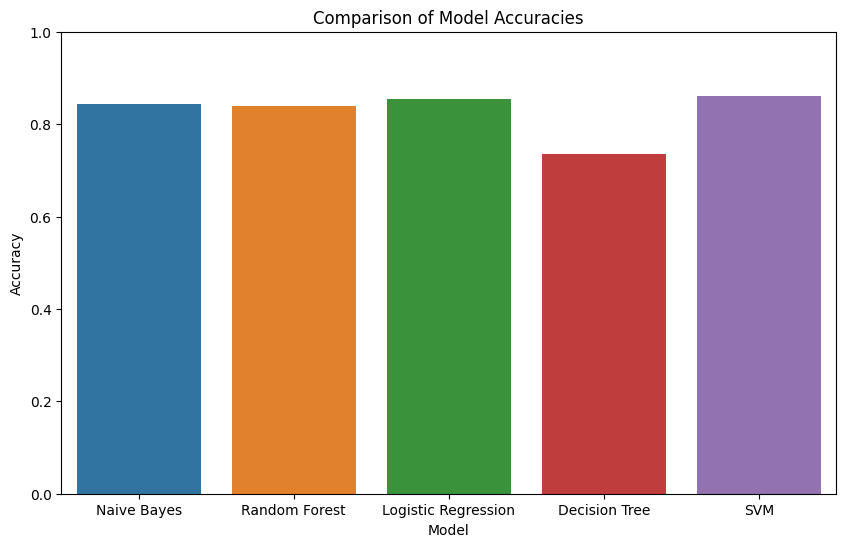

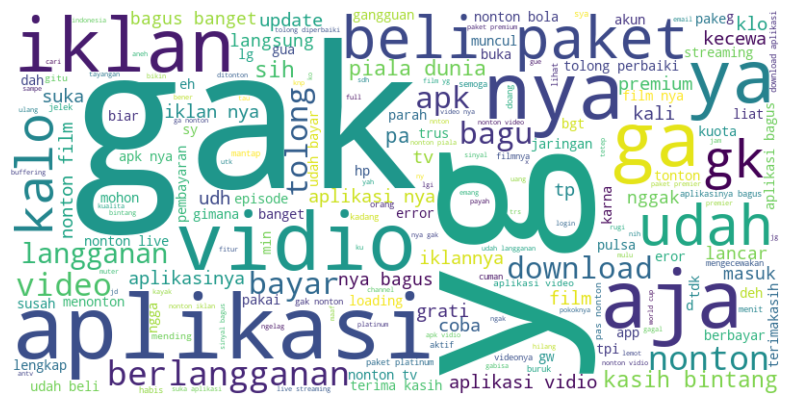

In [21]:
# Ekstraksi fitur dengan TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), use_idf=True)
X_train_features = vectorizer.fit_transform(X_train_resampled.ravel())
X_test_features = vectorizer.transform(X_test_reshaped.ravel())

# Inisialisasi model
models = {
    "Naive Bayes": ComplementNB(alpha=0.1),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Latih dan evaluasi setiap model
results = {}

for model_name, model in models.items():
    model.fit(X_train_features, y_train_resampled)
    y_pred = model.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel is used for simplicity, you can try other kernels

# Latih model SVM
svm_model.fit(X_train_features, y_train_resampled)

# Evaluasi model SVM
y_pred_svm = svm_model.predict(X_test_features)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM - Accuracy:", accuracy_svm)
print("\nSVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Tambahkan hasil SVM ke results
results["SVM"] = {
    "accuracy": accuracy_svm,
    "classification_report": classification_report(y_test, y_pred_svm, output_dict=True)
}

# Visualisasi perbandingan akurasi
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Gabungkan semua teks menjadi satu string untuk WordCloud
all_text = ' '.join([' '.join(tokens) for tokens in data['data_clean']])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tuning

Best parameters for Naive Bayes: {'alpha': 1}
Best cross-validation accuracy: 0.8386572752078179

Tuned Naive Bayes - Accuracy: 0.8463897407304154

Tuned Naive Bayes - Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.85      0.88      2415
    positive       0.73      0.84      0.78      1172

    accuracy                           0.85      3587
   macro avg       0.82      0.84      0.83      3587
weighted avg       0.86      0.85      0.85      3587


Random Forest - Accuracy: 0.8383049902425426

Random Forest - Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.85      0.88      2415
    positive       0.73      0.81      0.77      1172

    accuracy                           0.84      3587
   macro avg       0.81      0.83      0.82      3587
weighted avg       0.85      0.84      0.84      3587


Logistic Regression - Accuracy: 0.8547532757178701

Logistic Regress

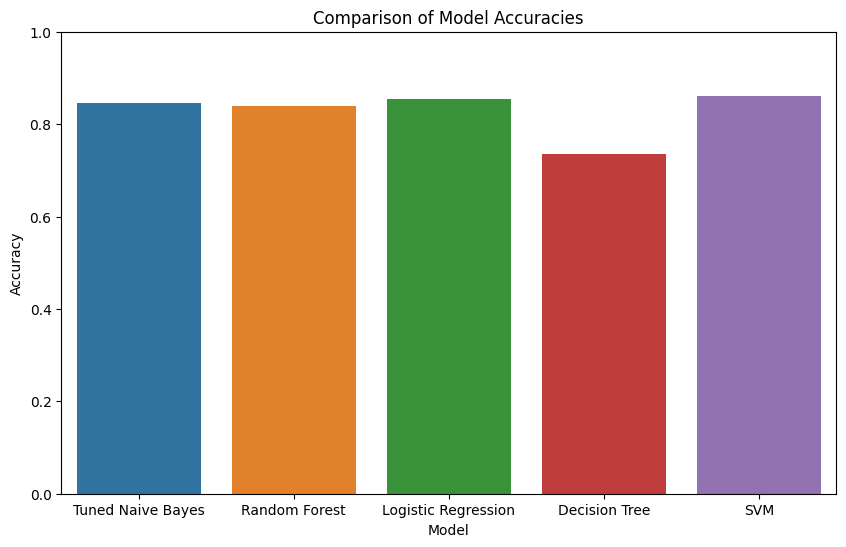

In [22]:
# Ekstraksi fitur dengan TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), use_idf=True)
X_train_features = vectorizer.fit_transform(X_train_resampled.ravel())
X_test_features = vectorizer.transform(X_test_reshaped.ravel())

# Hyperparameter tuning for Naive Bayes using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 2]}
grid_search = GridSearchCV(ComplementNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_features, y_train_resampled)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters for Naive Bayes: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train Naive Bayes with the best parameters
best_nb_model = ComplementNB(alpha=best_params['alpha'])
best_nb_model.fit(X_train_features, y_train_resampled)

# Evaluate the tuned Naive Bayes model
y_pred_best_nb = best_nb_model.predict(X_test_features)
accuracy_best_nb = accuracy_score(y_test, y_pred_best_nb)
print("\nTuned Naive Bayes - Accuracy:", accuracy_best_nb)
print("\nTuned Naive Bayes - Classification Report:")
print(classification_report(y_test, y_pred_best_nb))

# Inisialisasi model lainnya
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Latih dan evaluasi setiap model
results = {
    "Tuned Naive Bayes": {
        "accuracy": accuracy_best_nb,
        "classification_report": classification_report(y_test, y_pred_best_nb, output_dict=True)
    }
}

for model_name, model in models.items():
    model.fit(X_train_features, y_train_resampled)
    y_pred = model.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

# Visualisasi perbandingan akurasi
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [24]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
